In [487]:
import pandas as pd
import numpy as np 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
#pip install imbalanced-learn
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)

In [488]:
import requests
import io

url = 'https://raw.githubusercontent.com/ahmedsameh909/Health-Care-Project/Ahmed_branch/Data_Heart_clean.csv'
response = requests.get(url)
Data = pd.read_csv(io.StringIO(response.text))

In [489]:
display(Data.shape)
display(Data.head())

(273614, 39)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,None of them,0,...,Age 80 or older,1.70,81.65,28.25,No,0,1,0,1,0
1,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,No,6.0,None of them,0,...,Age 80 or older,1.60,68.04,26.58,No,0,0,0,0,0
2,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,0,...,Age 35 to 39,1.65,63.50,23.32,No,0,1,1,0,0
3,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,0,...,Age 40 to 44,1.57,53.98,21.90,Yes,0,0,1,0,0
4,Alabama,Male,Poor,1.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,None of them,1,...,Age 80 or older,1.80,84.82,26.18,No,0,0,1,0,0


In [490]:

display(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273614 entries, 0 to 273613
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      273614 non-null  object 
 1   Sex                        273614 non-null  object 
 2   GeneralHealth              273614 non-null  object 
 3   PhysicalHealthDays         273614 non-null  float64
 4   MentalHealthDays           273614 non-null  float64
 5   LastCheckupTime            273614 non-null  object 
 6   PhysicalActivities         273614 non-null  object 
 7   SleepHours                 273614 non-null  float64
 8   RemovedTeeth               273614 non-null  object 
 9   HadHeartAttack             273614 non-null  int64  
 10  HadAngina                  273614 non-null  int64  
 11  HadStroke                  273614 non-null  int64  
 12  HadAsthma                  273614 non-null  int64  
 13  HadSkinCancer              27

None

In [491]:
Data.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,...,DifficultyErrands,ChestScan,HeightInMeters,WeightInKilograms,BMI,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear
count,273614.000000,273614.000000,273614.000000,273614.000000,273614.000000,273614.000000,273614.000000,273614.000000,273614.00000,273614.000000,...,273614.000000,273614.000000,273614.000000,273614.000000,273614.000000,273614.000000,273614.000000,273614.000000,273614.000000,273614.000000
mean,4.058857,4.088223,6.994606,0.052932,0.059412,0.039910,0.147580,0.084279,0.07549,0.200187,...,0.065223,0.418381,1.703554,83.356910,28.647040,0.339606,0.527579,0.402216,0.663234,0.041646
std,8.354704,8.045344,1.251049,0.223899,0.236395,0.195749,0.354684,0.277807,0.26418,0.400141,...,0.246920,0.493294,0.105620,20.806568,6.406451,0.473576,0.499240,0.490346,0.472605,0.199780
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.910000,22.680000,6.770000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.630000,68.040000,24.340000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.700000,81.650000,27.720000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,3.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,1.780000,93.890000,31.830000,1.000000,1.000000,1.000000,1.000000,0.000000
max,30.000000,30.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,2.410000,292.570000,117.220000,1.000000,1.000000,1.000000,1.000000,1.000000


----------------------

----------------------

--------------------------


In [492]:
model_data = Data.copy()
model_data = model_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

C:\Users\pc\AppData\Local\Temp\ipykernel_22088\1155803517.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  model_data = model_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [493]:
num_cols = model_data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = model_data.select_dtypes(include=['object', 'category']).columns

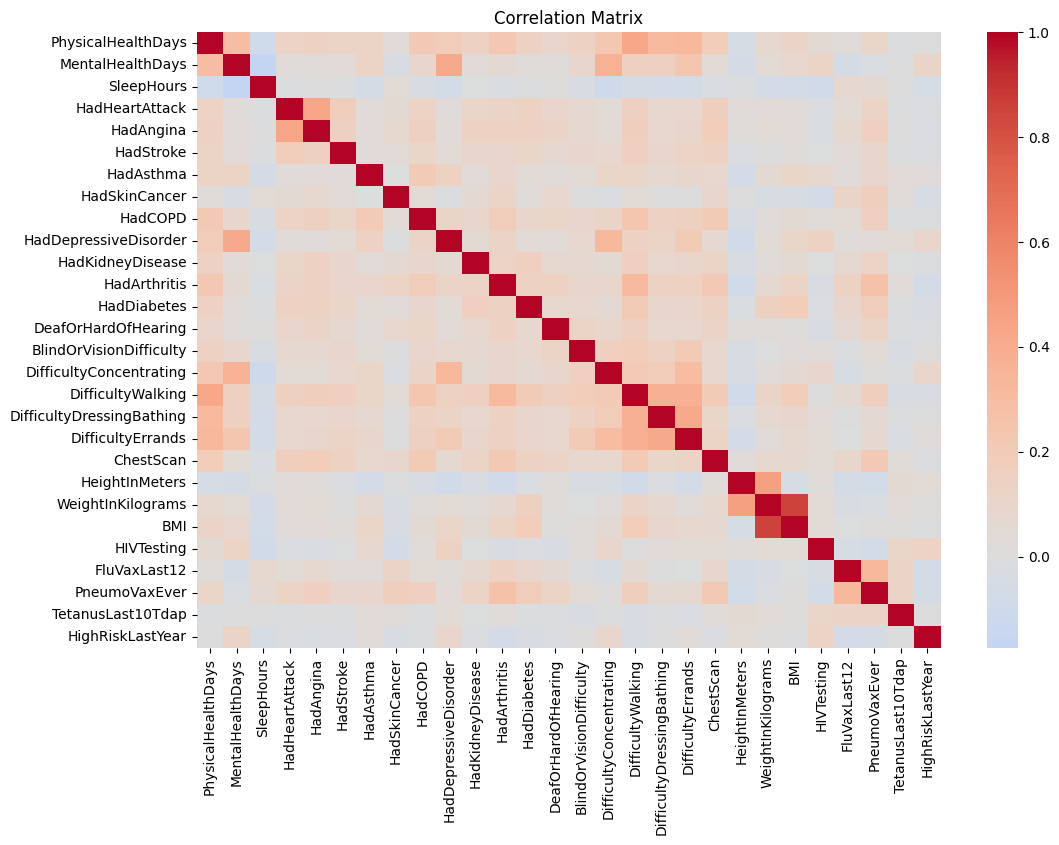


Correlation with target:
 HadHeartAttack               1.000000
HadAngina                    0.443693
HadStroke                    0.174700
ChestScan                    0.165936
DifficultyWalking            0.155178
HadDiabetes                  0.137969
HadCOPD                      0.131777
PhysicalHealthDays           0.130556
PneumoVaxEver                0.119100
HadArthritis                 0.115564
HadKidneyDisease             0.106650
DeafOrHardOfHearing          0.097640
DifficultyErrands            0.083982
DifficultyDressingBathing    0.078836
BlindOrVisionDifficulty      0.070592
HadSkinCancer                0.050966
DifficultyConcentrating      0.049247
FluVaxLast12                 0.046235
WeightInKilograms            0.037627
BMI                          0.028516
HadAsthma                    0.025800
MentalHealthDays             0.024407
HeightInMeters               0.023830
HadDepressiveDisorder        0.023607
SleepHours                  -0.007579
TetanusLast10Tdap      

In [494]:
numeric_cols = model_data.select_dtypes(include=[np.number])
corr = numeric_cols.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

target_corr = corr[target].sort_values(ascending=False)
print("\nCorrelation with target:\n", target_corr)

In [495]:
model_data.drop(columns=[ 
    'SleepHours',
    'TetanusLast10Tdap',
    'HIVTesting',
    'HighRiskLastYear'
])

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,FluVaxLast12,PneumoVaxEver
0,alabama,female,very good,0.0,0.0,within past year (anytime less than 12 months ...,no,none of them,0,0,...,not at all (right now),0,"white only, non-hispanic",age 80 or older,1.70,81.65,28.25,no,1,0
1,alabama,female,excellent,0.0,0.0,within past year (anytime less than 12 months ...,no,none of them,0,0,...,never used e-cigarettes in my entire life,0,"white only, non-hispanic",age 80 or older,1.60,68.04,26.58,no,0,0
2,alabama,female,excellent,0.0,0.0,within past year (anytime less than 12 months ...,yes,none of them,0,0,...,never used e-cigarettes in my entire life,1,"white only, non-hispanic",age 35 to 39,1.65,63.50,23.32,no,1,1
3,alabama,female,fair,2.0,0.0,within past year (anytime less than 12 months ...,yes,none of them,0,0,...,never used e-cigarettes in my entire life,1,"white only, non-hispanic",age 40 to 44,1.57,53.98,21.90,yes,0,1
4,alabama,male,poor,1.0,0.0,within past year (anytime less than 12 months ...,no,none of them,1,0,...,never used e-cigarettes in my entire life,0,"white only, non-hispanic",age 80 or older,1.80,84.82,26.18,no,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273609,virgin islands,female,fair,0.0,7.0,within past year (anytime less than 12 months ...,yes,none of them,0,0,...,never used e-cigarettes in my entire life,0,"black only, non-hispanic",age 25 to 29,1.93,90.72,24.36,no,0,0
273610,virgin islands,male,good,0.0,15.0,within past year (anytime less than 12 months ...,yes,1 to 5,0,0,...,never used e-cigarettes in my entire life,0,"multiracial, non-hispanic",age 65 to 69,1.68,83.91,29.73,yes,1,1
273611,virgin islands,female,excellent,2.0,2.0,within past year (anytime less than 12 months ...,yes,none of them,0,0,...,never used e-cigarettes in my entire life,0,"black only, non-hispanic",age 50 to 54,1.70,83.01,28.72,no,1,0
273612,virgin islands,male,very good,0.0,0.0,within past year (anytime less than 12 months ...,no,none of them,1,0,...,never used e-cigarettes in my entire life,1,"black only, non-hispanic",age 70 to 74,1.83,108.86,32.51,no,1,1


In [496]:
model_data[num_cols]

,PhysicalHealthDays,MentalHealthDays,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,...,DifficultyErrands,ChestScan,HeightInMeters,WeightInKilograms,BMI,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear
0,0.0,0.0,8.0,0,0,0,0,0,0,0,...,0,0,1.70,81.65,28.25,0,1,0,1,0
1,0.0,0.0,6.0,0,0,0,0,1,0,0,...,0,0,1.60,68.04,26.58,0,0,0,0,0
2,0.0,0.0,7.0,0,0,0,1,0,0,0,...,0,1,1.65,63.50,23.32,0,1,1,0,0
3,2.0,0.0,9.0,0,0,0,0,0,0,0,...,0,1,1.57,53.98,21.90,0,0,1,0,0
4,1.0,0.0,7.0,1,0,1,0,0,0,0,...,0,0,1.80,84.82,26.18,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273609,0.0,7.0,7.0,0,0,0,0,0,0,1,...,0,0,1.93,90.72,24.36,0,0,0,0,0
273610,0.0,15.0,7.0,0,0,1,0,0,0,0,...,0,0,1.68,83.91,29.73,1,1,1,1,0
273611,2.0,2.0,7.0,0,0,0,0,0,0,0,...,0,0,1.70,83.01,28.72,1,1,0,1,0
273612,0.0,0.0,5.0,1,0,0,1,0,0,0,...,0,1,1.83,108.86,32.51,1,1,1,0,0


In [497]:
cols_to_convert = [
    'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
    'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
    'ChestScan', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
    'TetanusLast10Tdap', 'HighRiskLastYear', 'HadHeartAttack'
]

for col in cols_to_convert:
    model_data[col] = model_data[col].replace({1: 'yes', 0: 'no'})

In [498]:
model_data.select_dtypes(include=['int64', 'float64']).columns

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object')

In [499]:
model_data[cat_cols]

,State,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers
0,alabama,female,very good,within past year (anytime less than 12 months ...,no,none of them,never smoked,not at all (right now),"white only, non-hispanic",age 80 or older,no
1,alabama,female,excellent,within past year (anytime less than 12 months ...,no,none of them,never smoked,never used e-cigarettes in my entire life,"white only, non-hispanic",age 80 or older,no
2,alabama,female,excellent,within past year (anytime less than 12 months ...,yes,none of them,current smoker - now smokes some days,never used e-cigarettes in my entire life,"white only, non-hispanic",age 35 to 39,no
3,alabama,female,fair,within past year (anytime less than 12 months ...,yes,none of them,never smoked,never used e-cigarettes in my entire life,"white only, non-hispanic",age 40 to 44,yes
4,alabama,male,poor,within past year (anytime less than 12 months ...,no,none of them,never smoked,never used e-cigarettes in my entire life,"white only, non-hispanic",age 80 or older,no
...,...,...,...,...,...,...,...,...,...,...,...
273609,virgin islands,female,fair,within past year (anytime less than 12 months ...,yes,none of them,never smoked,never used e-cigarettes in my entire life,"black only, non-hispanic",age 25 to 29,no
273610,virgin islands,male,good,within past year (anytime less than 12 months ...,yes,1 to 5,never smoked,never used e-cigarettes in my entire life,"multiracial, non-hispanic",age 65 to 69,yes
273611,virgin islands,female,excellent,within past year (anytime less than 12 months ...,yes,none of them,never smoked,never used e-cigarettes in my entire life,"black only, non-hispanic",age 50 to 54,no
273612,virgin islands,male,very good,within past year (anytime less than 12 months ...,no,none of them,never smoked,never used e-cigarettes in my entire life,"black only, non-hispanic",age 70 to 74,no


In [500]:
model_data['ECigaretteUsage'] = model_data['ECigaretteUsage'].replace({
    'never used e-cigarettes in my entire life': 'no',
    'not at all (right now)': 'no',
    
    'use them some days': 'yes',
    'use them every day': 'yes'
})

In [501]:
model_data['ECigaretteUsage'].value_counts()

ECigaretteUsage
no     259870
yes     13744
Name: count, dtype: int64

In [502]:
model_data['RemovedTeeth'] = model_data['RemovedTeeth'].replace({
    'none of them': 'no',
    '1 to 5': 'yes',
    '6 or more, but not all': 'yes',
    'all': 'yes'
})

In [503]:
model_data['RemovedTeeth'].value_counts()

RemovedTeeth
no     149915
yes    123699
Name: count, dtype: int64

In [504]:
model_data['SmokerStatus'] = model_data['SmokerStatus'].replace({
    'never smoked': 'no',
    'former smoker': 'yes',
    'current smoker - now smokes every day': 'yes',
    'current smoker - now smokes some days': 'yes'
})


In [505]:
model_data['SmokerStatus'].value_counts()

SmokerStatus
no     165832
yes    107782
Name: count, dtype: int64

In [506]:
model_data.drop(columns=['RaceEthnicityCategory','LastCheckupTime'], inplace=True)

In [507]:
num_cols = model_data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = model_data.select_dtypes(include=['object', 'category']).columns

In [508]:
num_cols,cat_cols

(Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
        'HeightInMeters', 'WeightInKilograms', 'BMI'],
       dtype='object'),
 Index(['State', 'Sex', 'GeneralHealth', 'PhysicalActivities', 'RemovedTeeth',
        'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
        'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
        'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
        'BlindOrVisionDifficulty', 'DifficultyConcentrating',
        'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
        'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'AgeCategory',
        'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
        'TetanusLast10Tdap', 'HighRiskLastYear'],
       dtype='object'))

In [509]:
model_data.drop(columns=["State"], inplace=True)


In [510]:
model_data['AgeCategory'].value_counts()

AgeCategory
age 65 to 69       31591
age 60 to 64       29473
age 70 to 74       28464
age 55 to 59       24393
age 50 to 54       21994
age 75 to 79       20191
age 80 or older    19866
age 40 to 44       18930
age 45 to 49       18608
age 35 to 39       17553
age 30 to 34       15235
age 18 to 24       14661
age 25 to 29       12655
Name: count, dtype: int64

In [511]:
age_map = {
    'age 18 to 24': 21,
    'age 25 to 29': 27,
    'age 30 to 34': 32,
    'age 35 to 39': 37,
    'age 40 to 44': 42,
    'age 45 to 49': 47,
    'age 50 to 54': 52,
    'age 55 to 59': 57,
    'age 60 to 64': 62,
    'age 65 to 69': 67,
    'age 70 to 74': 72,
    'age 75 to 79': 77,
    'age 80 or older': 82
}

model_data['AgeCategory'] = model_data['AgeCategory'].replace(age_map)


C:\Users\pc\AppData\Local\Temp\ipykernel_22088\2104020134.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  model_data['AgeCategory'] = model_data['AgeCategory'].replace(age_map)


In [512]:
model_data['AgeCategory']

0         82
1         82
2         37
3         42
4         82
          ..
273609    27
273610    67
273611    52
273612    72
273613    42
Name: AgeCategory, Length: 273614, dtype: int64

In [513]:
yes_data = model_data[model_data['HadHeartAttack'] == 'yes']
yes_data.shape

(14483, 36)

In [514]:
no_data = model_data[model_data['HadHeartAttack'] == 'no']
no_data.shape

(259131, 36)

In [515]:
chunk_size = len(yes_data)
no_data = no_data.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_datasets = []
for i in range(0, len(no_data), chunk_size):
    no_chunk = no_data.iloc[i:i + chunk_size]
    if len(no_chunk) < chunk_size:
        break  
    balanced_data = pd.concat([yes_data, no_chunk]).sample(frac=1, random_state=42).reset_index(drop=True)
    balanced_datasets.append(balanced_data)

In [541]:

final_balanced_data = pd.concat(balanced_datasets[0:9], ignore_index=True)

final_balanced_data = final_balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)


In [542]:
final_balanced_data['HadHeartAttack'].value_counts()

HadHeartAttack
no     130347
yes    130347
Name: count, dtype: int64

In [543]:
target = 'HadHeartAttack'
X = final_balanced_data.drop(columns=[target])
y = final_balanced_data[target]

In [544]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

In [545]:
label_encoder = LabelEncoder()
for col in cat_cols:
    if X[col].nunique() == 2:
        X[col] = label_encoder.fit_transform(X[col])

label_encoder.fit_transform(y)


array([0, 0, 1, ..., 1, 0, 1], shape=(260694,))

In [546]:
X[cat_cols].select_dtypes(include=['object', 'category']).columns

Index(['GeneralHealth'], dtype='object')

In [547]:
X.drop(columns=['GeneralHealth'], inplace=True)

In [548]:
X.shape

(260694, 34)

✅ Accuracy: 0.8005

Classification Report:
               precision    recall  f1-score   support

          no       0.78      0.84      0.81     26033
         yes       0.83      0.76      0.79     26106

    accuracy                           0.80     52139
   macro avg       0.80      0.80      0.80     52139
weighted avg       0.80      0.80      0.80     52139


Confusion Matrix:
 [[21823  4210]
 [ 6190 19916]]


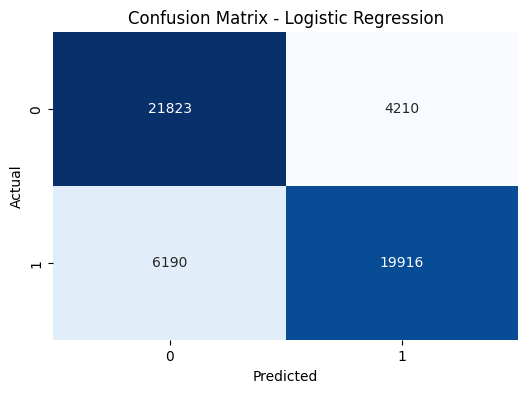

In [549]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [550]:

rf_model = RandomForestClassifier(
    n_estimators=200,       # number of trees
    max_depth=None,         # can tune later
    random_state=42,
    n_jobs=-1               # use all CPU cores
)
rf_model.fit(X_train, y_train)

# -----------------------------
# 4️⃣ Predictions
# -----------------------------
y_pred = rf_model.predict(X_test)

# -----------------------------
# 5️⃣ Evaluate
# -----------------------------
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.9818945511037803

📊 Confusion Matrix:
 [[25089   944]
 [    0 26106]]

🧾 Classification Report:
               precision    recall  f1-score   support

          no       1.00      0.96      0.98     26033
         yes       0.97      1.00      0.98     26106

    accuracy                           0.98     52139
   macro avg       0.98      0.98      0.98     52139
weighted avg       0.98      0.98      0.98     52139



 Confusion Matrix:
 [[25089   944]
 [    0 26106]]


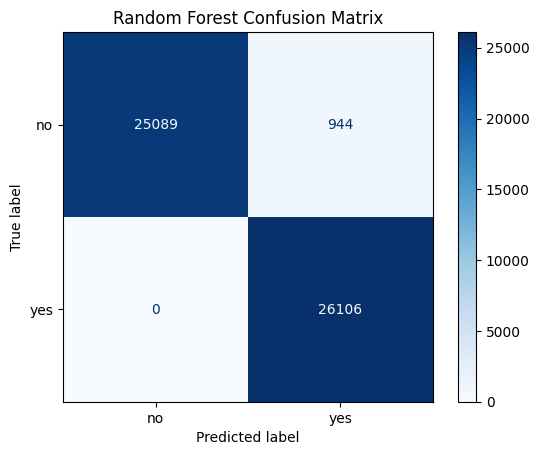

In [551]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(" Confusion Matrix:\n", cm)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Random Forest Confusion Matrix")
plt.show()


In [540]:
train_acc = rf_model.score(X_train, y_train)
test_acc = rf_model.score(X_test, y_test)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Train Accuracy: 0.9999784226993204
Test Accuracy: 0.8991110727539484


In [ ]:
test_data = pd.concat(balanced_datasets[10::], ignore_index=True)

In [553]:
test_data.shape

(202762, 36)

In [ ]:
X_test = test_data.drop(columns=['HadHeartAttack'])
y_test = test_data['HadHeartAttack']

from sklearn.preprocessing import LabelEncoder
for col in X_test.select_dtypes(include='object').columns:
    if X_test[col].nunique() == 2:
        X_test[col] = LabelEncoder().fit_transform(X_test[col])

X_test = pd.get_dummies(X_test, drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

y_pred = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("✅ Test Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))


✅ Test Accuracy: 0.9816435032205245

📊 Confusion Matrix:
 [[ 97659   3722]
 [     0 101381]]

🧾 Classification Report:
               precision    recall  f1-score   support

          no       1.00      0.96      0.98    101381
         yes       0.96      1.00      0.98    101381

    accuracy                           0.98    202762
   macro avg       0.98      0.98      0.98    202762
weighted avg       0.98      0.98      0.98    202762

